<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Exploration/%5BE-04%5D%EC%9E%91%EC%82%AC%EA%B0%80%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) 데이터 전처리

## 1-1. 데이터 읽어오기

In [17]:
import glob

txt_file_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 한줄씩 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

데이터 크기: 187088
Examples:
 ['Ooh....... New York x2 Grew up in a town that is famous as a place of movie scenes', 'Noise is always loud, there are sirens all around and the streets are mean', "If I can make it here, I can make it anywhere, that's what they say"]


## 1-2. 데이터 정제

데이터 확인

In [20]:
for idx, sentence in enumerate(raw_corpus):
    # 18만이 넘는 문장을 모두 확인할 수 없기 때문에
    # 적당히 500문장마다 텍스트를 확인해준다.
    if idx % 5000 != 1:
      continue
    print(sentence)


Noise is always loud, there are sirens all around and the streets are mean
Despacito
Should I go back should I go back should I
In a quiet town Steady as she goes
That I hold close to see your face again With you is where I'd rather be
Last time I checked I was still breathin'
Without this love that we call ours
Driving 'cross the Waynesboro county line
Does not concern the bee;

We'll just live our lives one day at a time
(Shut the fuck)
Hey, looking boy, what you say looking boy?
I go to T-R-L, look how many hugs I get
Like the car with the strap in it
Say no more, oh no more,
Then do the same at your funeral
Yeezy, Yeezy, Yeezy, I feel so accomplished
Throwing shit around the whole place screwed up
And aint nobody feel my pain
'Cause you know that baby I I'm your biggest fan
Chorus
And I got y'all knuckleheads in loco parentis
I heard you masturbate a lot, so y'all keep to yourself
Represent your coast
Saying That She's Yours Not Mine
Or see it on the TV screen
Another charlatan to 

대괄호와 대괄호 안의 내용을 제거하고 싶어서 정규표현식을 `r"\[[^\]]+\]"`라고 표현하였다.<br>
대괄호 안에 포함되는 내용으로 `[^\]]`로 오른쪽 대괄호를 제외한 모든 문자를 지정했다.<br>
그 이유는 바깥범위 괄호 안에  내부의 괄호들이 포함되면 안되기 때문이다.<br><br>
올바른 정규표현식을 사용하였는지 확인하기 위해 findall함수의 결과로 저장된 match리스트의 원소를 출력해보았다.

In [144]:
import re
from collections import defaultdict

# 가사가 아닌 텍스트가 얼마나 있는지 확인
pattern_list = ["instrumental", "chorus", "Chorus", r"\[[^\]]+\]"]
count = [0, 0, 0, 0]
dict_count = defaultdict(int)   # 새로운 키가 들어오면 초기값을 0으로 가진다.

for idx, pat in enumerate(pattern_list):
  for sentence in raw_corpus:
    match = re.findall(pat, sentence)            # match는 찾은 패턴을 모두 담은 리스트
    if match:
        #print(pat, str(len(match)), 'Found!')   # len(match)는 찾은 패턴의 개수
        count[idx]+=1

        if idx==3:     # 4번째 패턴(대괄호)이 얼마나 발견되었는지 카운트한다.
          count2 += 1
          #print(match, end=' ')          # 대괄호 포함, 대괄호 내부에 어떤 내용이 있는지 확인해보자.
          dict_count[match[0]] += 1      # 중복값이 많은 것 같아 dict타입을 통해 몇가지 고유한 데이터가 있는지, 몇 개씩 있는지 확인하고 싶었다.
      

print()
print(count)                    # 각 패턴이 몇개씩 발견되었는지 보여준다.
print(len(dict_count))          # 총 1534의 패턴이 발견된 것에 비해 고유한 값은 411개가 있다. (즉, 평균적으로 3.7번 반복된다.)
print(dict_count.items())
print(dict_count['[Chorus]'])   # 정규표현으로 찾은 'Chorus'패턴의 개수와 다르다.
print(dict_count['[chorus]'])   # 정규표현으로 찾은 'chorus'패턴의 개수와 다르다.


[5, 39, 685, 1534]
411
dict_items([('[Chorus]', 306), ('[Chorus: x2]', 25), ('[CHORUS]', 25), ('[Incomprehensible]', 19), ('[Verse 1]', 24), ('[Pre-Chorus]', 12), ('[Verse 2]', 22), ('[Verse 3]', 6), ('[Bridge]', 24), ('[Big Sean]', 1), ('[Justin Bieber]', 4), ('[Drake]', 4), ('[both]', 1), ('[Verse]', 2), ('[Outro]', 9), ('[X5]', 1), ('[X4]', 4), ('[Repeat: x3]', 9), ('[Verse 1: Matt Skiba]', 1), ('[Chorus: Mark Hoppus (Matt Skiba)]', 2), ('[Verse 2: Mark Hoppus]', 1), ('[Bridge: Mark Hoppus and Matt Skiba]', 1), ('[Outro: Mark Hoppus (Matt Skiba)]', 1), ('[Chorus x2:]', 3), ('[Chorus x2]', 3), ('[Clean version:]', 1), ('[Explicit version:]', 1), ('[x2:]', 1), ('[Adele]', 2), ('[Chorus:]', 70), ('[Chorus:Repeat x3]', 1), ('[Fade]', 1), ('[Chorus:Repeat x2]', 5), ('[Repeat: x4]', 10), ('[Repeats]', 5), ('[Repeat to end]', 1), ('[Instrumental]', 5), ('[Verse 1:]', 5), ('[Verse 2:]', 5), ('[Bridge:]', 7), ("[Je t'aime Aicha et je meurs pour toi]", 1), ('[Toi, tu es mon âme et ma vie]', 

단어는 **공백**을 기준으로 나눌 것이다.<br>
그리고 I'm 또는 It'll, It's, 'Cause, We'll과 같이 '와 붙어있는 텍스트는 한 단어로 취급한다.

<br>

가사 텍스트 데이터를 훑어보고 처리해야겠다고 생각한 부분은 다음과 같다.

1. 양쪽 공백제거 및 모두 소문자로 변환
2. 문장부호 , ? . ! ¿가 있는 곳은 양옆에 공백을 추가해서 다른 단어와 분리해준다.
3. 대괄호[ ]와 그 안에 있는 내용을 공백으로 치환한다. (가사와 상관없는 텍스트가 들어있다. ex) chorus, 가수명 등)
4. 'instrumental'을 공백으로 치환한다. (반주중이라는 의미.)
5. 특수문자('포함)를 제거한다.
6. 공백이 여러 개 있는 부분은 공백 하나로 대체한다.
7. 다시 문장의 양쪽 공백을 제거한다.
8. 비어있지 않는 문장 앞에는 <start\>토큰, 뒤에는 <end\>토큰을 추가해준다.


--> 'chorus'나 'Chorus'를 지울까 말까 고민했지만 가사로서 의미가 있을 수도 있기 때문에 대괄호안의 패턴만 지우기로 정했다.

In [31]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()                        # 1
    #print(sentence)
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)        # 2
    #print(sentence)
    sentence = re.sub(r"\[[^\]]+\]", " ", sentence)            # 3
    #print(sentence)
    sentence = re.sub(r"instrumental", " ", sentence)          # 4
    #print(sentence)
    sentence = re.sub(r"[^a-zA-Z0-9?.!,¿']+", " ", sentence)  # 5
    #print(sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)                # 6
    #print(sentence)
    sentence = sentence.strip()                                # 7
    #print(sentence)

    if sentence:
      sentence = '<start> ' + sentence + ' <end>'              # 8
    return sentence

In [ ]:
# 문장이 어떻게 필터링되는지 확인 (print문 주석처리 이전)
sent = "This @_is ;;;sample        sentence. ten-year-old? [chorus] -instrumental-- I'll"
print('입력문장->',sent)
print(preprocess_sentence(sent))

입력문장-> This @_is ;;;sample        sentence. ten-year-old? [chorus] -instrumental-- I'll
this @_is ;;;sample        sentence. ten-year-old? [chorus] -instrumental-- i'll
this @_is ;;;sample        sentence .  ten-year-old ?  [chorus] -instrumental-- i'll
this @_is ;;;sample        sentence .  ten-year-old ?    -instrumental-- i'll
this @_is ;;;sample        sentence .  ten-year-old ?    - -- i'll
this is sample sentence . ten year old ? i'll
this is sample sentence . ten year old ? i'll
this is sample sentence . ten year old ? i'll
<start> this is sample sentence . ten year old ? i'll <end>


In [32]:
# 여기에 전처리된 문장을 모은다.
corpus = []

for sentence in raw_corpus:
    # 우리가 원하지 않는 문장은 건너뛴다. (공백)
    if len(sentence) == 0: continue
    
    # 전처리함수에 문장을 입력 후 전처리된 문장을 corpus리스트에 추가.
    preprocessed_sentence = preprocess_sentence(sentence)   # (print문 주석처리 이후)
    
    # 토큰이 3개보다 적거나 15개보다 많은 문장은 건너뛴다.
    if len(preprocessed_sentence.split(' '))<3 or len(preprocessed_sentence.split(' '))>15: continue

    corpus.append(preprocessed_sentence)

# 문장 개수
print(len(corpus))

# 전처리된 문장 10개 확인
corpus[:10]

158241


["<start> baby , i'm from new york <end>",
 '<start> concrete jungle where dreams are made of <end>',
 "<start> there's nothing you can't do <end>",
 "<start> now you're in new york <end>",
 '<start> these streets will make you feel brand new <end>',
 '<start> big lights will inspire you <end>',
 "<start> baby , i'm from new york <end>",
 '<start> concrete jungle where dreams are made of <end>',
 "<start> there's nothing you can't do <end>",
 "<start> now you're in new york <end>"]

## 1-3. 토큰화

[tf.keras.preprocessing.sequence.pad_sequences함수 설명](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)

In [45]:
# 텐서플로우의 Tokenizer와 pad_sequences를 사용하여 토큰화한다.
import tensorflow as tf

# 20000단어를 기억할 수 있는 tokenizer
# 20000단어가 있는 사전에 포함되지 않는 단어는 '<unk>'로 바꾼다.
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=20000, 
        filters=' ',
        oov_token="<unk>"
    )
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)

    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus) 

    # 입력 데이터의 뒷부분을 0으로 패딩해준다.
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    print(tensor.shape)
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

(158241, 15)
[[    2    49     4 ...     0     0     0]
 [    2  2811  2083 ...     0     0     0]
 [    2   169   179 ...     0     0     0]
 ...
 [    2    28    17 ... 18674     3     0]
 [    2   349    17 ...     3     0     0]
 [    2    37   130 ...     0     0     0]] <keras_preprocessing.text.Tokenizer object at 0x7faf1a797410>


In [46]:
print(tensor[:3, :])

[[   2   49    4   20   67  153  723    3    0    0    0    0    0    0
     0]
 [   2 2811 2083   97  382   71  225   18    3    0    0    0    0    0
     0]
 [   2  169  179    7   86   44    3    0    0    0    0    0    0    0
     0]]


In [47]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 20: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : the
6 : i
7 : you
8 : and
9 : a
10 : to
11 : me
12 : my
13 : it
14 : in
15 : that
16 : on
17 : your
18 : of
19 : .
20 : i'm


## 1-4. 훈련 데이터셋과 평가 데이터셋 분리

총 데이터의 20% 를 평가 데이터셋으로 사용한다.

In [48]:
from sklearn.model_selection import train_test_split

src_input = tensor[:, :-1]   # 처음~마지막-1
tgt_input = tensor[:, 1:]    # 처음+1~마지막

enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size=0.2, random_state=55)

데이터셋에서 랜덤으로 선택된 80%만큼의 훈련데이터셋의 크기이다.

In [49]:
print("Source Train:", enc_train.shape)
print("Target Train:", dec_train.shape)

Source Train: (126592, 14)
Target Train: (126592, 14)


데이터셋 객체 생성

In [50]:
BUFFER_SIZE = len(src_input)   # source sentence 수
BATCH_SIZE = 256               # 한 번 학습할 데이터 수
steps_per_epoch = len(src_input) // BATCH_SIZE

# VOCAB_SIZE: 벡터화한 단어 개수
# --> tokenizer가 구축한 단어사전 내 20000개와 여기 포함되지 않은 0:<pad>를 포함하여 총 20001개이다.
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다

dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)   # 데이터셋을 배치크기씩 나눈다.
                                                           # drop_remainder=True는 배치크기보다 작은 그룹을 버린다.
dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

# 2) 모델 구성

임베딩함수 원형:<br>
tf.keras.layers.Embedding(
    **input_dim, output_dim,** embeddings_initializer='uniform',
    embeddings_regularizer=None, activity_regularizer=None,
    embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs
)
- vacab_size는 input_dim, embedding_size는 output_dim이다.
- [참고) 공식문서](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [51]:
import tensorflow as tf

class TextGenerator(tf.keras.Model):
  # embedding_size는 word vector의 차원수이다.
  # hidden_size는 LSTM레이어의 hidden state의 차원수이다.
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [52]:
# 데이터셋에서 데이터 한 배치만 불러온다.
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어보자.
model(src_sample)

<tf.Tensor: shape=(256, 14, 20001), dtype=float32, numpy=
array([[[-3.44408145e-05, -5.84209665e-05,  1.15623343e-05, ...,
         -8.28510238e-05, -1.77241367e-04, -3.74066040e-05],
        [-1.29350781e-04,  6.24055610e-06, -1.88207152e-04, ...,
         -2.09484831e-04, -2.21459035e-04,  1.07923966e-04],
        [-1.97173184e-04,  1.97598521e-04, -2.60885427e-04, ...,
         -3.32754105e-04, -3.11866723e-04,  2.46382842e-04],
        ...,
        [ 4.25484555e-04, -1.90563238e-04, -4.41034674e-04, ...,
         -7.11990520e-04, -4.61622985e-04, -2.88437353e-04],
        [ 2.07282050e-04, -4.79477370e-04, -4.76158777e-04, ...,
         -5.90488198e-04, -5.11380029e-04, -5.95187419e-04],
        [-2.26919601e-05, -7.31857610e-04, -4.80441173e-04, ...,
         -4.73272026e-04, -5.89812233e-04, -8.70058546e-04]],

       [[-3.44408145e-05, -5.84209665e-05,  1.15623343e-05, ...,
         -8.28510238e-05, -1.77241367e-04, -3.74066040e-05],
        [ 1.70633703e-05, -1.61141637e-04, -2

In [53]:
model.summary()

Model: "text_generator_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      multiple                  5120256   
_________________________________________________________________
lstm_10 (LSTM)               multiple                  5246976   
_________________________________________________________________
lstm_11 (LSTM)               multiple                  8392704   
_________________________________________________________________
dense_5 (Dense)              multiple                  20501025  
Total params: 39,260,961
Trainable params: 39,260,961
Non-trainable params: 0
_________________________________________________________________


# 3) 모델 학습

tensorflow가 GPU를 잘 사용하고 있는지 확인
- tf.config.list_physical_devices('GPU')로도 확인가능한 것 같다.

In [54]:
tf.test.is_gpu_available()

True

이번 프로젝트 조건!
- 모델의 Embedding Size와 Hidden Size를 조절하며 **10 Epoch 안에 val_loss 값을 2.2 수준**으로 줄일 수 있는 모델을 설계하세요! (Loss는 아래 제시된 Loss 함수를 그대로 사용!)

In [57]:
optimizer = tf.keras.optimizers.Adam()
#Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

model.compile(loss=loss, optimizer=optimizer)
history = model.fit(dataset, epochs=10, validation_data = (enc_val, dec_val))

Epoch 1/10
618/618 [==============================] - 290s 464ms/step - loss: 3.5400 - val_loss: 3.1564
Epoch 2/10
618/618 [==============================] - 287s 465ms/step - loss: 3.0999 - val_loss: 2.9753
Epoch 3/10
618/618 [==============================] - 286s 462ms/step - loss: 2.9416 - val_loss: 2.8253
Epoch 4/10
618/618 [==============================] - 286s 462ms/step - loss: 2.8117 - val_loss: 2.7044
Epoch 5/10
618/618 [==============================] - 288s 466ms/step - loss: 2.7006 - val_loss: 2.5999
Epoch 6/10
618/618 [==============================] - 289s 467ms/step - loss: 2.6017 - val_loss: 2.5062
Epoch 7/10
618/618 [==============================] - 288s 466ms/step - loss: 2.5106 - val_loss: 2.4160
Epoch 8/10
618/618 [==============================] - 288s 466ms/step - loss: 2.4274 - val_loss: 2.3382
Epoch 9/10
618/618 [==============================] - 288s 466ms/step - loss: 2.3503 - val_loss: 2.2624
Epoch 10/10
618/618 [==============================] - 288s 466m

**model.fit()은 히스토리 객체를 반환**한다.
이 객체는 학습이력(history) 정보를 담고 있다.
- 매 epoch 마다의 훈련 손실값 (loss)
- 매 epoch 마다의 훈련 정확도 (acc)
- 매 epoch 마다의 검증 손실값 (val_loss)
- 매 epoch 마다의 검증 정확도 (val_acc)

In [75]:
history.history['val_loss']

[3.1564061641693115,
 2.9753198623657227,
 2.825295925140381,
 2.704441785812378,
 2.5998620986938477,
 2.5062427520751953,
 2.4159767627716064,
 2.3382177352905273,
 2.262406826019287,
 2.1932497024536133]

이 객체를 이용하면 loss를 그래프로 표현하여 학습 추세를 확인할 수 있다.

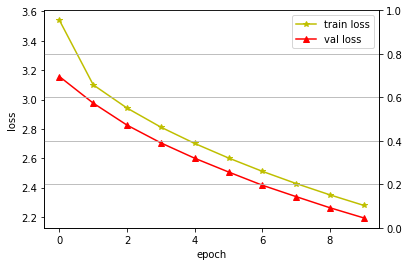

In [80]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', marker='*', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', marker='^', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='best')

plt.grid(True)
plt.show()

# 4) 모델 평가
학습된 모델로 텍스트 생성해보기<br>
다양한 입력텍스트를 넣어보자.

In [59]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

|입력|생성된 텍스트|
|------|--------|
|<start\> i love|<start\> i love you , i love you <end\>|
|<start\> I|<start\> i don't know what to do <end\>|
|<start\> babe|<start\> babe , yeah , yeah , yeah <end\>|
|<start\> why|<start\> why you wanna be with me <end\>|
|<start\> what are you|<start\> what are you waiting for ? <end\> |
|<start\> are you|<start\> are you ready ? <end\> |
|<start\> summer night|<start\> summer night , happy birthday , happy birthday woo , shake ! <end\> |
|<start\> over the|<start\> over the sun , the <unk\> <end\> |
|<start\> will you|<start\> will you still love me ? <end\> |
|<start\> feeling|<start\> feeling like a rocket <end\> |
|<start\> i'm|<start\> i'm a survivor <end\> |
|<start\> loving|<start\> loving you , you , you , you , you , you , you , you , you , you <end\> |
|<start\> don't|<start\> don't you know that i love you <end\> |
|<start\> teddy|<start\> teddy say she was a hooligan for me <end\> |
|<start\> Jessy|<start\> <unk\> , <unk\> , <unk\> , <end\> |

In [61]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you , i love you <end> '

In [67]:
generate_text(model, tokenizer, init_sentence="<start> I", max_len=20)

"<start> i don't know what to do <end> "

In [65]:
generate_text(model, tokenizer, init_sentence="<start> love", max_len=100)

'<start> love is a beautiful thing <end> '

In [70]:
generate_text(model, tokenizer, init_sentence="<start> babe", max_len=100)

'<start> babe , yeah , yeah , yeah <end> '

In [71]:
generate_text(model, tokenizer, init_sentence="<start> why", max_len=100)

'<start> why you wanna be with me <end> '

In [72]:
generate_text(model, tokenizer, init_sentence="<start> what are you", max_len=100)

'<start> what are you waiting for ? <end> '

In [81]:
generate_text(model, tokenizer, init_sentence="<start> are you", max_len=100)

'<start> are you ready ? <end> '

In [83]:
generate_text(model, tokenizer, init_sentence="<start> summer night", max_len=100)

'<start> summer night , happy birthday , happy birthday woo , shake ! <end> '

In [84]:
generate_text(model, tokenizer, init_sentence="<start> over the", max_len=100)

'<start> over the sun , the <unk> <end> '

In [86]:
generate_text(model, tokenizer, init_sentence="<start> will you", max_len=100)

'<start> will you still love me ? <end> '

In [90]:
generate_text(model, tokenizer, init_sentence="<start> feeling", max_len=100)

'<start> feeling like a rocket <end> '

In [93]:
generate_text(model, tokenizer, init_sentence="<start> i'm", max_len=100)

"<start> i'm a survivor <end> "

In [94]:
generate_text(model, tokenizer, init_sentence="<start> loving", max_len=100)

'<start> loving you , you , you , you , you , you , you , you , you , you <end> '

In [101]:
generate_text(model, tokenizer, init_sentence="<start> don't", max_len=20)

"<start> don't you know that i love you <end> "

In [120]:
generate_text(model, tokenizer, init_sentence="<start> teddy", max_len=100)

'<start> teddy say she was a hooligan for me <end> '

\<unk>는 단어사전에 없는 토큰을 의미한다.

In [132]:
generate_text(model, tokenizer, init_sentence="<start> Jessy", max_len=100)

'<start> <unk> , <unk> , <unk> , <end> '

**<start\>토큰으로 시작하지 않는 입력을 넣으면 어떻게 될까?**
- 자주 쓰이는 단어들로 이루어져 있으면 그럴싸한 텍스트를 생성하는데
- 희소한 단어를 입력하면 이상한 단어를 계속 반복한다. (<end\>토큰이 나타나지 않음)

|입력|생성된 텍스트|
|------|--------|
|take me|take me , baby <end\>|
|while|while i don't know what to do <end\>|
|Jessica|tjessica viagra doves shutter doves shutter doves shutter doves shutter|
|Jessy|<unk\> viagra suffer changin' shutter doves shutter doves shutter doves |

In [104]:
generate_text(model, tokenizer, init_sentence="take me", max_len=20)

'take me , baby <end> '

In [130]:
generate_text(model, tokenizer, init_sentence="while", max_len=20)

"while i don't know what to do <end> "

In [135]:
generate_text(model, tokenizer, init_sentence="Jessica", max_len=10)

'jessica viagra doves shutter doves shutter doves shutter doves shutter '

In [136]:
generate_text(model, tokenizer, init_sentence="Jessy", max_len=10)

"<unk> viagra suffer changin' shutter doves shutter doves shutter doves "

모델 저장

In [137]:
model.save('lyrics_final')

INFO:tensorflow:Assets written to: lyrics_final/assets


INFO:tensorflow:Assets written to: lyrics_final/assets


# 회고

### 시행착오)
- 모델이 학습되면서 출력하는 loss는 training데이터에 대한 loss인데, validation데이터에 대한 loss로 착각했다.
 - 학습시킬 때 validation loss를 확인하려면 **model.fit의 옵션에 x_val, y_val**을 넣어줘야 한다.
- epoch를 예제와 같이 30으로 지정하고 학습했더니 loss(심지어 train loss)가 잘 줄어들어서 거의 완성했다고 생각했다.<br>*(역시 내가 너무 앞서가고 있다고 생각이 들면 뒤를 돌아봐야한다. 아예 다른 길로 가고 있을 수 있으니...)*

### 배운점)
- tensorflow에 대한 이해도가 낮은 상태로 모델을 학습시키는 코드를 보았을 때 거의 블랙박스처럼 겉핡기로만 보고 있었다는 것을 깨달았다. 덕분에 항상 궁금했던 **history객체**의 역할을 알게 되었고 앞으로 유용하게 쓸 수 있을 것 같다.
- history객체를 통해 loss 또는 accuracy를 쉽게 시각화할 수 있다.

### 더 알아볼점)
- 하지만 아직까지도 <u>학습시키는 모델을 어떻게 저장하고 로드</u>하는지 구현해보지 못했다. 이번 프로젝트에서는 .h5로 저장할 때 오류가 발생했고, weight를 저장하는 방법은 load_weights를 한 후에 generate_text를 수행하는 데 어려움이 있었다.
 - **callback**이라는 것을 더 알아봐야겠다.
- <start\>토큰으로 시작하는 텍스트를 입력으로 넣었을 때와 그렇지 않은 경우의 결과가 다른 이유, <start\>토큰으로 입력을 넣으면 결과가 더 잘 나오는 이유 등을 알고 싶다.